In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Data processing
# Load the dataset
df = pd.read_csv('creditcard.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# Preprocessing
# Scale the 'Amount' column using StandardScaler
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Drop unnecessary columns 'Time' and 'Amount'
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Splitting into train and test sets
X = df.drop('Class', axis=1).values
y = df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Model
# Build the model
model = Sequential()

# Add a dense layer with 128 neurons and ReLU activation as the first layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add a dropout layer with 40% dropout rate to reduce overfitting
model.add(Dropout(0.4))

# Add a dense layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Add a dropout layer with 40% dropout rate
model.add(Dropout(0.4))

# Add a dense layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Add a dropout layer with 40% dropout rate
model.add(Dropout(0.4))

# Add the final output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))


In [17]:
# Objective function and Optimization function
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

# Print classification metrics (classification report, and AUC-ROC score)
print('Classification Report:')
print(classification_report(y_test, y_pred_classes))
print('AUC-ROC Score:', roc_auc_score(y_test, y_pred))

Epoch 1/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 2/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 3/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 4/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 5/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 6/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 7/10
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy:

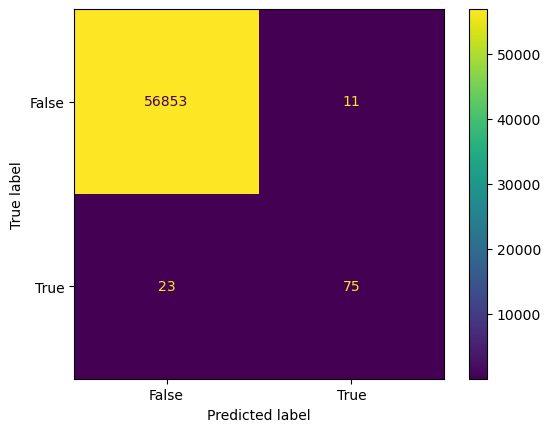

In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt 

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]) 
import matplotlib.pyplot as plt 
cm_display.plot()
plt.show() 